In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

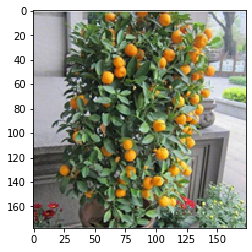

In [2]:
#Loading image file
img = cv2.imread('image1.png')
orange = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #by default, opencv reads images in BGR format

plt.imshow(orange)
plt.show()

In [3]:
r, g, b = cv2.split(orange) #splits the image into by its colour
pixel_colors = orange.reshape((np.shape(orange)[0]*np.shape(orange)[1], 3))#setting up pixel colours
norm = colors.Normalize(vmin=-1.,vmax=1.) #Normalizing the pixels
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist() #image pixels flattened into a list for facecolors parameter

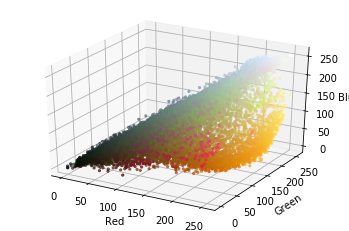

In [4]:
#Visualize the image in RGB colour space
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

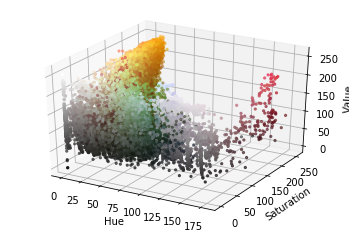

In [5]:
#Comparing the above rgb colour-space with hsv to understand the colour segmentation
hsv_orange = cv2.cvtColor(orange, cv2.COLOR_RGB2HSV) #converting image from rgb to hsv

h, s, v = cv2.split(hsv_orange)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors= pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

In [6]:
lower_boundary = (10, 100, 20) #Orange colour thresholds
upper_boundary = (25, 255, 255)
mask = cv2.inRange(hsv_orange, lower_boundary, upper_boundary) #returns an array of 0, 1
result = cv2.bitwise_and(orange, orange, mask=mask)

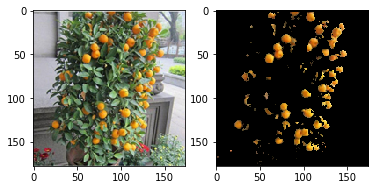

In [7]:
# plt.subplot(1, 2, 1)
# plt.imshow(mask, cmap="gray")

fig = plt.subplot()
plt.subplot(1, 2, 1)
plt.imshow(orange)

plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

In [8]:
# cv2.imwrite("Result.png", result)
# result = cv2.imread('result.png')
# plt.imshow(result)
# plt.show()